# Feature Selection

 - Identify and select the most appropriate features from the data and remove the irrelevant or less important features
 - Reducing number of features and find the best set of features  
 There are several benefits of feature selection
 - Some are given below:
     - Reduces overfitting: Less redundant data (introduces bias and noise) means less opportunity to make decisions based on noise.
     - Improves Accuracy: Less misleading data means modeling accuracy improves.
     - Reduces Training Time: Less data means that algorithms train faster.
     - It helps in avoiding the curse of dimensionality.
 - In this notebook, we discuss several feature selection algorithms
     - Algorithm 1: Dropping Constant Features using Variance Threshold Technique
     - Algorithm 2: Feature Selection using Pearson's correlation
     - Algorithm 3: Feature Selection using Information Gain (SelectkBest and SelectPercentile)
     - Algorithm 4: Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

# Algorithm 1 - Dropping Constant Features (features with no variation) using Variance Threshold Technique

In [1]:
import pandas as pd
# Make a dataframe for the following data

data = pd.DataFrame({"A":[1,2,4,1,2,4],
                     "B":[4,5,6,7,8,9],
                     "C":[0,0,0,0,0,0],
                     "D":[1,1,1,1,1,1]}
                    )
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


# Variance Threshold:

 - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
 - class sklearn.feature_selection.VarianceThreshold(threshold=0.0)
 - Feature selector that removes all low-variance features.
 - This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [2]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0. non-zero variance, i.e. remove the features that have the same value in all samples
var_thresh.fit(data)

VarianceThreshold()

In [3]:
var_thresh.get_support()

array([ True,  True, False, False])

In [4]:
print("All features: ", data.columns)
print("Features Selected: ", data.columns[var_thresh.get_support()]) # selects only the True columns

All features:  Index(['A', 'B', 'C', 'D'], dtype='object')
Features Selected:  Index(['A', 'B'], dtype='object')


In [5]:
# the following code drops the columns based on the variance threshold algorithm
selected_columns = data.columns[var_thresh.get_support()]
for cols in data.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [6]:
data

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


# Algorithm 2 - Feature Selection with Pearson's correlation: statistical relationship between random variables

# Idea

 - Highly correlated features with the target variable are important features 
 - High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate/redundant features.
 - In case of duplicate features, we do not need to take all the features but one one of them would suffice

# Pearson's correlation coefficient (r)
- Measure of linear correlation between two sets of data
- Value between −1 and 1
- r = 1: strong positive correlation
- r = -1: strong negative correlation
- r = 0: No linear correlation
- Highly correlated features with the target variable are important features
- High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate features.
- In case of duplicate features, we do not need to take all the features but one one of them would suffice
- Pearson's correlation coefficient formula: 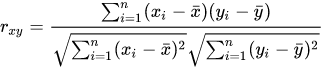

In [7]:
## Let's load the Absenteeism dataset

df = pd.read_excel('absenteeism.xls')
print(df.shape)
df.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [8]:
df.dropna(inplace = True)
print(df.shape)

(639, 21)


In [9]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
# Separate the independent (X) and dependent (y) features
y = df['Absenteeism time in hours']
X = df.drop(columns = 'Absenteeism time in hours')


In [11]:
X.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0


In [12]:
y.head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [13]:
# Let's first drop the feature id as it is a personal identifier
# Let's split the data into train and test set
# Note that correlation will be done only on the training dataset
from sklearn.model_selection import train_test_split
X.drop(columns = "ID", inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [14]:
# let's import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
X_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
645,27.0,3.0,6,2,179.0,51.0,18.0,38.0,222196.0,99.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
588,27.0,2.0,4,2,179.0,51.0,18.0,38.0,264249.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
51,0.0,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0
54,0.0,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0
88,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0


In [16]:
# Let's find the feature correlations in the training set NOT in the total/test set

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
Reason for absence,1.000000,-0.082365,0.139880,-0.141645,-0.108721,0.187522,0.099970,-0.044458,-0.141390,0.032852,-0.509388,-0.050810,-0.056189,0.121760,-0.079242,-0.066426,0.010671,-0.090484,0.053957
Month of absence,-0.082365,1.000000,-0.042561,0.394502,0.126988,-0.039480,-0.066917,0.009941,-0.110607,-0.474779,0.111391,-0.025659,0.049621,0.005340,-0.028218,0.042912,0.024668,-0.065343,0.048347
Day of the week,0.139880,-0.042561,1.000000,0.048180,0.010392,0.096749,0.021794,0.013481,0.041432,0.012381,-0.037094,0.082978,0.091858,0.027641,0.040792,-0.029048,-0.145997,-0.064513,-0.128202
Seasons,-0.141645,0.394502,0.048180,1.000000,0.049554,-0.065337,-0.013556,-0.014083,0.142321,-0.063809,0.126736,0.032900,0.000724,-0.080454,-0.020047,0.012827,-0.010173,-0.048552,0.011707
Transportation expense,-0.108721,0.126988,0.010392,0.049554,1.000000,0.224753,-0.347612,-0.202000,0.053691,-0.079950,0.111324,-0.057344,0.369093,0.117376,0.045165,0.338960,-0.209951,-0.186753,-0.141915
Distance from Residence to Work,0.187522,-0.039480,0.096749,-0.065337,0.224753,1.000000,0.162415,-0.127041,-0.024887,-0.016185,-0.042408,-0.251078,0.040158,0.458648,-0.080751,0.190246,-0.029693,-0.350742,0.129575
Service time,0.099970,-0.066917,0.021794,-0.013556,-0.347612,0.162415,1.000000,0.652352,0.003865,-0.021079,-0.012317,-0.257400,-0.055222,0.385568,0.099249,-0.455354,0.465684,-0.064983,0.512653
Age,-0.044458,0.009941,0.013481,-0.014083,-0.202000,-0.127041,0.652352,1.000000,-0.051574,-0.048063,0.088810,-0.250159,0.052568,0.231321,0.137464,-0.227388,0.418176,-0.066631,0.470392
Work load Average/day,-0.141390,-0.110607,0.041432,0.142321,0.053691,-0.024887,0.003865,-0.051574,1.000000,-0.104236,0.031562,-0.079139,0.025612,-0.033912,0.040739,0.028977,-0.024456,0.065756,-0.060561
Hit target,0.032852,-0.474779,0.012381,-0.063809,-0.079950,-0.016185,-0.021079,-0.048063,-0.104236,1.000000,-0.128949,0.123075,-0.019617,-0.077325,0.064472,-0.011375,-0.059414,0.115097,-0.109362


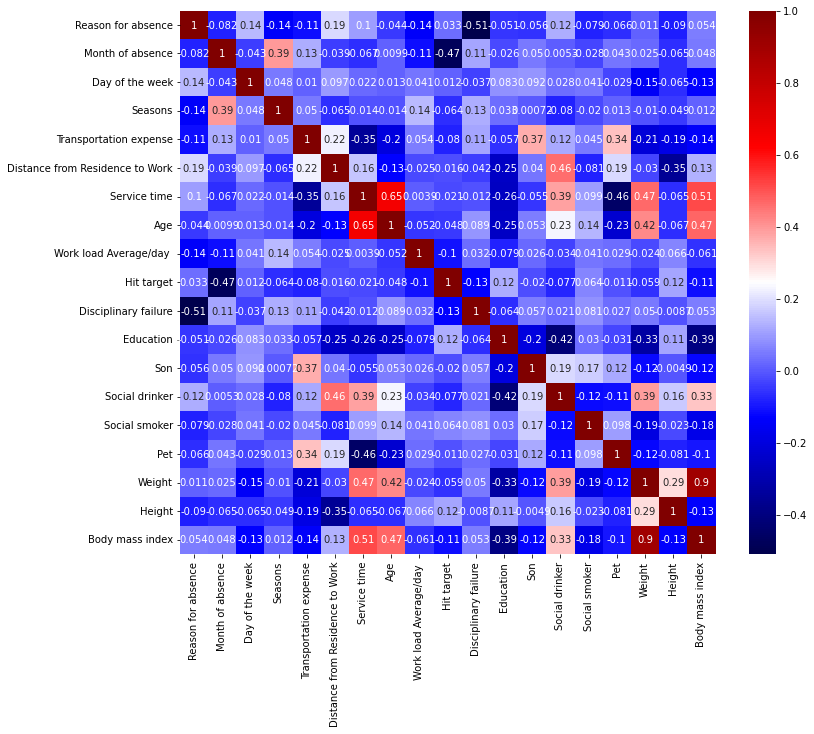

In [17]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

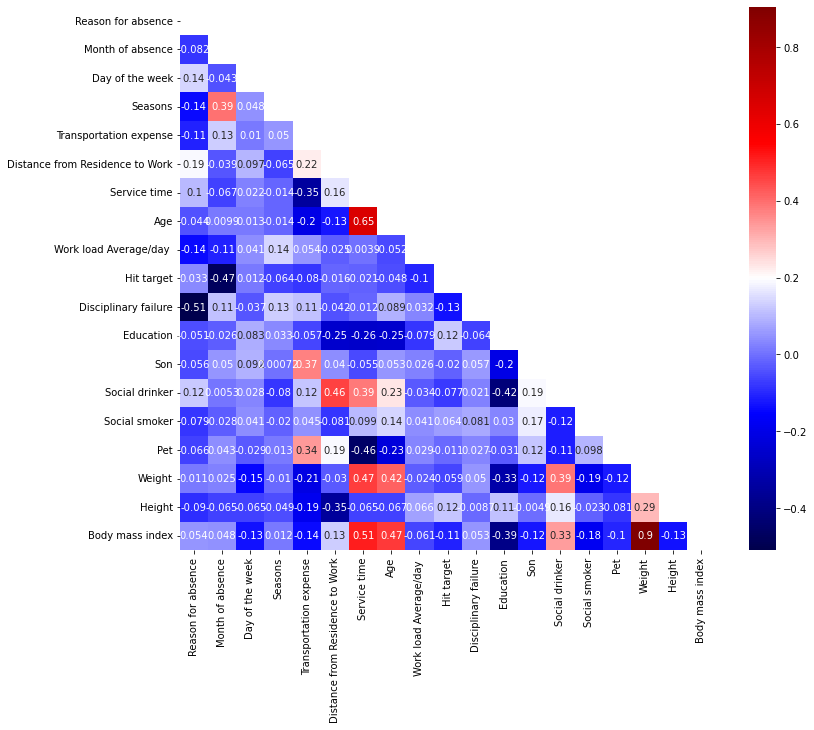

In [18]:
# upper and lower triangles are duplicated
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1); # mask1 removes the upper triangle
# sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2); # mask1 removes the lower triangle

In [19]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr() # correlation matrix of all the features
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(X_train, 0.7) # 85% is a good value of the threshold. It is a hyperparameter
print(len(corr_features))
print(corr_features)

1
{'Body mass index'}


In [21]:
X_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
645,27.0,3.0,6,2,179.0,51.0,18.0,38.0,222196.0,99.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
588,27.0,2.0,4,2,179.0,51.0,18.0,38.0,264249.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
51,0.0,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0
54,0.0,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0
88,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0


In [22]:
# X_train.drop('BMI',axis='columns')
  # X_test.drop('BMI',axis=1)

In [23]:
X_test.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')

# Algorithm 3 - Feature Selection using Information Gain

In [24]:
# Let's read a dataset [PIMA Indians Diabetes Dataset]
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df = df.dropna()
print("Shape: ", df.shape)
df["Outcome"].value_counts()

Shape:  (768, 9)


0    500
1    268
Name: Outcome, dtype: int64

In [26]:
# Let's separate the independent (X) and dependent (y) variables
y = df['Outcome']
X = df.drop(columns = 'Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [28]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
# IG(S, a) = H(S) – H(S | a)
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info


array([0.01837221, 0.13509057, 0.        , 0.        , 0.02507089,
       0.06988034, 0.00395167, 0.05538334])

In [29]:
print(len(mutual_info))
print(X_train.shape)

8
(614, 8)


In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.135091
BMI                         0.069880
Age                         0.055383
Insulin                     0.025071
Pregnancies                 0.018372
DiabetesPedigreeFunction    0.003952
BloodPressure               0.000000
SkinThickness               0.000000
dtype: float64

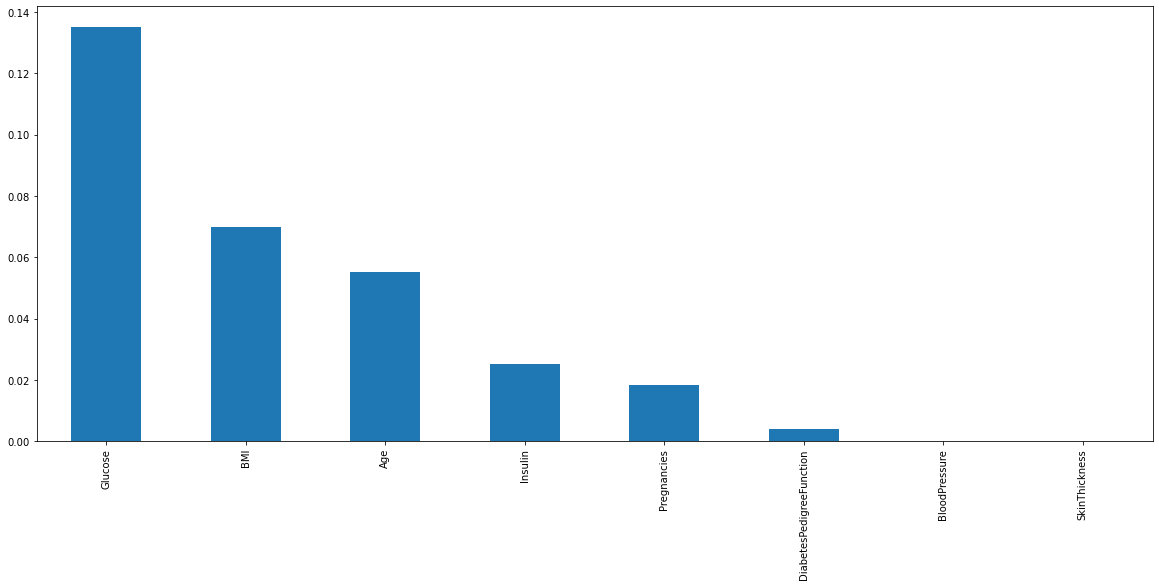

In [31]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [32]:
from sklearn.feature_selection import SelectKBest
# Select features according to the k highest scores

In [33]:
#Now we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age'], dtype='object')

In [34]:
from sklearn.feature_selection import SelectPercentile
# Select features according to a percentile of the highest scores.

In [35]:
#Now we Will select the top 60% important features
sel_five_cols_per = SelectPercentile(mutual_info_classif, percentile=60)
sel_five_cols_per.fit(X_train, y_train)
X_train.columns[sel_five_cols_per.get_support()]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

# Algorithm 4 - Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

 - URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
 - URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
 - Feature ranking with recursive feature elimination.
 

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
721,1,114,66,36,200,38.1,0.289,21
247,0,165,90,33,680,52.3,0.427,23
25,10,125,70,26,115,31.1,0.205,41
47,2,71,70,27,0,28.0,0.586,22
...,...,...,...,...,...,...,...,...
176,6,85,78,0,0,31.2,0.382,42
293,1,128,48,45,194,40.5,0.613,24
275,2,100,70,52,57,40.5,0.677,25
209,7,184,84,33,0,35.5,0.355,41


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [38]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 5


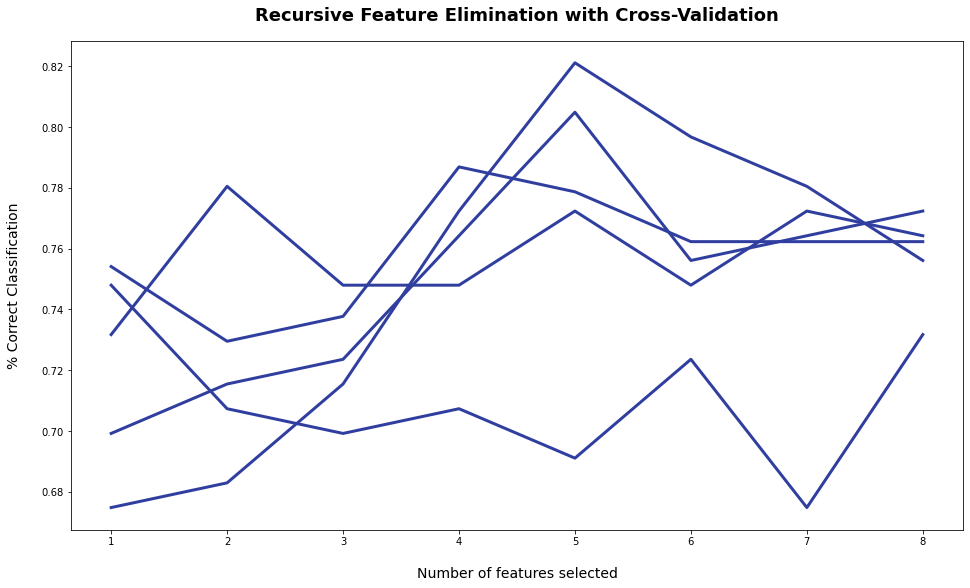

In [39]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [40]:
print(np.where(rfecv.support_ == False)[0])

[0 3 4]


In [41]:
selected_features = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)

In [42]:
rfecv.estimator_.feature_importances_

array([0.32187329, 0.11446682, 0.19684416, 0.17837373, 0.188442  ])

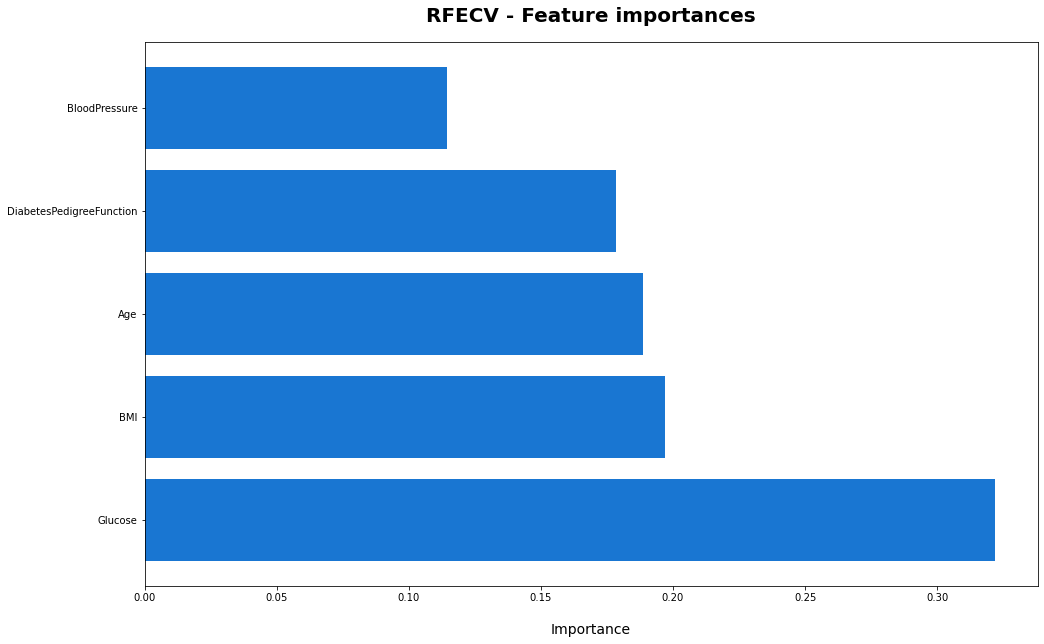

In [43]:
dset = pd.DataFrame()
dset['attr'] = selected_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [44]:
dset

,attr,importance
0,Glucose,0.321873
2,BMI,0.196844
4,Age,0.188442
3,DiabetesPedigreeFunction,0.178374
1,BloodPressure,0.114467
